## Связь с биологией

Наше зрительное восприятие устроено следующим образом:

*  Каждый фоторецептор на сетчатке нашего глаза (палочка или колбочка) реагирует только на свет, попавший на него.

* Сигнал от фоторецептора попадает на нейрон следующего уровня (биполярная клетка). Этот нейрон уже соединен с несколькими фоторецепторами. Область, в которой они локализованы, называется **рецептивным полем**.
Нейрон возбуждается при определенной комбинации сигналов от связанных с ним рецепторных клеток. По сути, он реагирует на простой, локально расположенный паттерн.

* Клетки уровнем выше (ганглиозные) собирают информацию с нескольких близко расположенных биполярных клеток и активируются при уникальной комбинации сигналов с них. Их рецептивное поле больше, и паттерны, на которые они реагируют, сложнее.

* Далее сигнал предается в мозг, но там связи между нейронами продолжают оставаться иерархическими. Рецептивное поле нейронов растет, и паттерны, на которые они активируются, становятся все более и более сложными.

**Рецептивное поле** нейрона — это участок с рецепторами, с которых он прямо или опосредованно, через другие нейроны, получает информацию.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/brain.png" width="1000">


## Ядра свёртки

Та же идея воплощена в свёрточных нейронных сетях. Формируются свёрточные слои, которые представляют собой матрицы (ядра свёртки), которые "проходят" по всему изображению и извлекают некие шаблоны:

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_with_filter.gif" width="1000">

Последовательность действий при применении ядра свёртки размером $3 \times 3$:

*  Для каждого пикселя исходного изображения берем окрестность размером $3 \times 3$.
*  Значение каждого пикселя из этой окресности умножаем на соответствующее значение из массива kernel (тоже $3 \times 3$).
*  Затем суммируем все 9 результатов, получившееся число записываем в новый массив.
* В результате получаем сглаженное изображение.

<img src = https://www.researchgate.net/publication/349391561/figure/fig5/AS:992398360469508@1613617615681/An-example-of-convolution-operation-in-2D-30.ppm>

Записать результат применения фильтра

\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix}

к изображению

\begin{bmatrix}
7 & 2 & 3 & -3 \\
4 & -5 & 3 & 2 \\
1 & 2 & -1 & 3 \\
2 & -2 & 1 & -3
\end{bmatrix}

Ответ:

Задание: реализовать функцию применения ядра свёртки (kernel) к изображению (img).

In [1]:
import torch
from torch import nn
import numpy as np

In [6]:
def apply_filter(img, kernel):
    h, w = img.shape                    # высота и ширина изображения
    kh, kw = kernel.shape               # высота и ширина ядра свёртки
    out = np.zeros((h-kh+1, w-kw+1))    # понять размерность выходной матрицы
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            patch = img[i:i+kh, j:j+kw]                     # получить патч нужной размерности
            new_pixel = np.multiply(patch, kernel).sum()    # произвести операции поэлементного умножения с последующим сложением
            out[i, j] = new_pixel                           # записать в массив, которым будет представлено выходное изображение
    return out

Проверим себя применением фильтра Собеля, который отвечает за перепад яркости по вертикали (грубо говоря, выделяет горизонтальные линии на изображении):

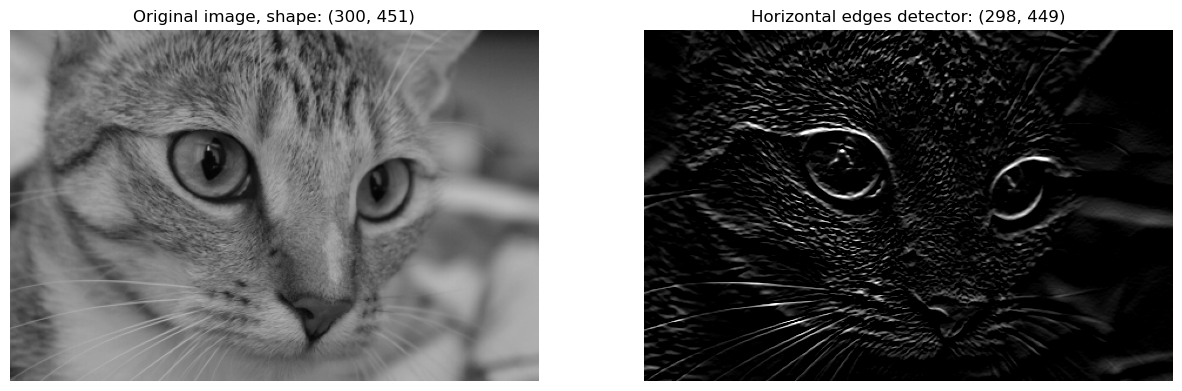

In [10]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

img_cat = data.cat().mean(axis=2).astype("int32")

sobel_y_kernel = torch.tensor([[ 1.0,  2.0, 1.0 ],
                               [ 0.0,  0.0, 0.0 ],
                               [-1.0, -2.0, -1.0]])

x_edges = apply_filter(img_cat, sobel_y_kernel)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(img_cat, cmap="gray", vmin=0, vmax=255)
axes[1].imshow(x_edges, cmap="gray", vmin=0, vmax=255)
axes[0].set(title=f"Original image, shape: {img_cat.shape}")
axes[1].set(title=f"Horizontal edges detector: {x_edges.shape}")
axes[0].axis("off")
axes[1].axis("off")
plt.show()

Задание: применить фильтр размытия (матрица $3 \times 3$, заполненая одинаковыми значениями 1/9) к изображению астронавта.

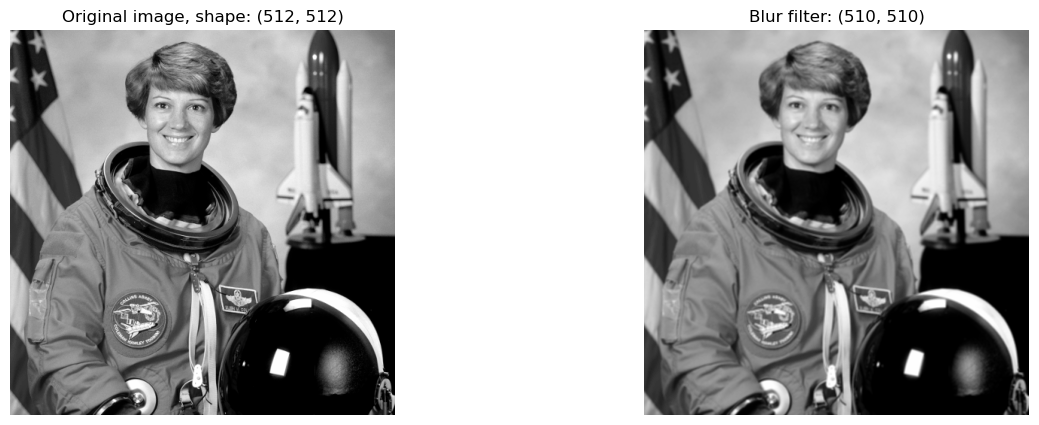

In [19]:
## WRITE YOUR CODE HERE
img_astronaut = data.astronaut().mean(axis=2).astype("int32")

sobel_y_kernel = torch.tensor([[ 0.1111,  0.1111, 0.1111 ],
                               [ 0.1111,  0.1111, 0.1111 ],
                               [ 0.1111,  0.1111, 0.1111 ]])

x_edges = apply_filter(img_astronaut, sobel_y_kernel)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(img_cat, cmap="gray", vmin=0, vmax=255)
axes[1].imshow(x_edges, cmap="gray", vmin=0, vmax=255)
axes[0].set(title=f"Original image, shape: {img_astronaut.shape}")
axes[1].set(title=f"Blur filter: {x_edges.shape}")
axes[0].axis("off")
axes[1].axis("off")
plt.show()


Применение различных видов свёртки к изображениям можно посмотреть [на сайте](https://setosa.io/ev/image-kernels/).

## Padding (расширение)

Заметим, что при уменьшении размера представлений, пиксели, находящиеся около краёв, участвуют в значительно меньшем количестве свёрток, чем пиксели в середине, хотя информация в них не обязательно менее ценна, чем информация из центральных пикселей. К примеру, пиксель в верхнем левом углу представления вне зависимости от размера фильтра будет принимать участие лишь в одной свёртке, и информация о нём будет сохранена лишь в верхнем левом углу нового представления.

Для борьбы с описанной выше проблемой применяется *набивка/дополнение* входного тензора (англ. *padding*). В ходе него ширина и высота тензора увеличиваются за счёт приписывания столбцов и строк с некими значениями. К примеру, на изображении ниже перед свёрткой ядром размера $3\times3$ был применён padding нулями.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/padding.png" width="1000">

На примере убедимся, что это позволит нам сохранить пространственные размерности тензоров.

In [ ]:
img = torch.randn((1, 1, 5, 5))  # create random image BCHW
print(f"Original tensor:\nshape:{img.shape}")
conv_3 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
conved_3 = conv_3(img)
print("Shape after convolution layer(kernel 3x3):", conved_3.shape)

Original tensor:
shape:torch.Size([1, 1, 5, 5])
Shape after convolution layer(kernel 3x3): torch.Size([1, 1, 3, 3])


Карта признаков имеет размерность, меньшую чем входное изображение. После добавления padding:


In [ ]:
# add zeros to image manually
padded_img = torch.zeros((1, 1, 7, 7))  # create zeros array to insert image in center
padded_img[:, :, 1:-1, 1:-1] += img  # insert image, we get image arounded by zeros
print(f"\nPadded tensor:\nshape:{padded_img.shape}:\n {padded_img}")

conved_pad_3 = conv_3(padded_img)
print("\n\nPadded shape:", padded_img.shape)
print("Shape after convolution with padding(kernel 3x3):", conved_pad_3.shape)


Padded tensor:
shape:torch.Size([1, 1, 7, 7]):
 tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -2.5333, -0.0583, -0.9997,  0.2372, -0.6469,  0.0000],
          [ 0.0000,  0.8245,  2.5379, -1.8841, -0.1553, -0.1653,  0.0000],
          [ 0.0000, -0.2147,  0.4785,  1.6431,  0.0438, -0.1078,  0.0000],
          [ 0.0000, -0.4732, -0.4771, -0.9531, -0.5091, -0.1310,  0.0000],
          [ 0.0000,  2.6703, -1.1752,  1.2805,  0.0788, -0.3765,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])


Padded shape: torch.Size([1, 1, 7, 7])
Shape after convolution with padding(kernel 3x3): torch.Size([1, 1, 5, 5])


## Stride (шаг свёртки)

До этого мы двигали фильтр на один пиксель, то есть перемещались с шагом (stride) один.

Если двигать фильтр с большим шагом, то размер выходной карты признаков (feature map) будет уменьшаться кратно шагу, и рецептивные поля нейронов будут расти быстрее.

Для изменения шага свертки в конструкторе [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) есть параметр `stride`.

In [ ]:
dummy_input = torch.randn(1, 1, 5, 5)
conv_s1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=(1, 1))
conv_s2 = nn.Conv2d(1, 3, 3, stride=2)  # bypass par. names, stride = (2, 2)

out_stride1 = conv_s1(dummy_input)
out_stride2 = conv_s2(dummy_input)

print("Out with stride 1", out_stride1.shape)
print("Out with stride 2", out_stride2.shape)

Out with stride 1 torch.Size([1, 3, 3, 3])
Out with stride 2 torch.Size([1, 3, 2, 2])


<center><img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_parameter_stride.gif" width="350"></center>
<center><em>Свёртка массива $5\times5$ фильтром размером $3\times3$ с шагом $2$ по вертикали и горизонтали.</em></center>

При этом важно заметить, что в некоторых случаях часть данных может не попасть в свёртку. К примеру, при $N = 7,\, K = 3,\, S = 3$. В данном случае, $\displaystyle N' = 1 + \frac{7 - 3}{3} = 2\frac13.$ В подобных ситуациях часть изображения не захватывается, в чём мы можем убедиться на наглядном примере:

In [ ]:
# Create torch tensor 7x7
# fmt: off
input = torch.tensor([[[[1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99]]]], dtype=torch.float)
# fmt: on

print(f"input shape: {input.shape}")

conv = torch.nn.Conv2d(
    in_channels=1,  # Number of channels
    out_channels=1,  # Number of filters
    kernel_size=3,
    stride=3,
    bias=False,  # Don't use bias
)
conv.weight = torch.nn.Parameter(
    torch.ones((1, 1, 3, 3))
)  # Replace random weights to ones
out = conv(input)

print(f"out shape: {out.shape}")
print(f"out:\n{out}")

input shape: torch.Size([1, 1, 7, 7])
out shape: torch.Size([1, 1, 2, 2])
out:
tensor([[[[9., 9.],
          [9., 9.]]]], grad_fn=<ConvolutionBackward0>)


Видно, что столбец с числами 99 просто не попал в свертку.
Поэтому на практике подбирают padding таким образом, чтобы при `stride = 1`  размер карты признаков на выходе был равен входу, а затем делают сверку со `stride = 2`.

Казалось бы, с увеличением шага $S$ рецептивное поле не выросло &mdash; как увеличивалось с $1$ до $K$, так и увеличивается. Однако обратим внимание на иное: если раньше размерность $N$ становилась $N - F + 1$, то теперь она станет $\displaystyle 1 + \frac{N-F}{S}$. В результате, если раньше следующий фильтр с размером $K'$ имел рецептивное поле в $\displaystyle N \cdot \frac{K'}{N'} = N \cdot \frac{K'}{N - F + 1}$, то теперь $\displaystyle N \cdot \frac{K'}{N'} = N \cdot \frac{K'}{1 + \frac{N-F}{S}}$. Понятно, что $\displaystyle \frac{K'}{N - F + 1} \leq \frac{K'}{1 + \frac{N-F}{S}}$, потому рецептивное поле каждого нейрона увеличивается.



## Pooling (уплотнение)

Другим вариантом стремительного увеличения размера рецептивного поля является использование дополнительных слоёв, требующих меньшее количество вычислительных ресурсов. Слои субдискретизации прекрасно выполняют эту функцию: подобно свёртке, производится разбиение изображения на небольшие сегменты, внутри которых выполняются операции, не требующие использования обучаемых весов. Два популярных примера подобных операций: получение максимального значения (max pooling) и получение среднего значения (average pooling).


Аналогично разбиению на сегменты при свёртке, слои субдискретизации имеют два параметра: размер фильтра $K$ (то есть, каждого из сегментов) и шаг $S$ (stride). Аналогично свёрткам, при применении субдискретизации формула размера стороны будет $\displaystyle N' = 1+ \frac{N-K}{S}.$

Ниже приведён пример использования операций max pooling и average pooling при обработке массива.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/subdiscretization_pooling.png" width="1000">

Реализуем это в коде:

In [20]:
input = torch.tensor([[[[1, 1, 2, 4],
                        [5, 6, 7, 8],
                        [3, 2, 1, 0],
                        [1, 2, 3, 4]]]], dtype=torch.float)

max_pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
avg_pool = torch.nn.AvgPool2d(kernel_size=2, stride=2)

print("Input:\n", input)
print("Max pooling:\n", max_pool(input))
print("Average pooling:\n", avg_pool(input))

Input:
 tensor([[[[1., 1., 2., 4.],
          [5., 6., 7., 8.],
          [3., 2., 1., 0.],
          [1., 2., 3., 4.]]]])
Max pooling:
 tensor([[[[6., 8.],
          [3., 4.]]]])
Average pooling:
 tensor([[[[3.2500, 5.2500],
          [2.0000, 2.0000]]]])


## Карта признаков

Ключевое отличие между линейным слоем и свёрткой заключается в том, что каждый нейрон линейного слоя получает на вход всё изображение сразу, а свёртка &mdash; небольшие фрагменты.

Так как при свертке для каждого фрагмента получаем свой отклик (признак), то для всего изображения получим уже массив признаков (feature map).

Свертки можно сравнить с лампочками, которые "загораются" сильнее, если на изображении есть определенный паттерн.

На картах активации вы НЕ найдете никакого "понятного" рисунка: они есть индикаторы наличия некоего паттерна на картинке.


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/katestroeva/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|████████████████████████████████████████| 233M/233M [00:05<00:00, 48.0MB/s]


Weights shape torch.Size([64, 3, 11, 11])
Output is CxHxW image torch.Size([3, 106, 106])


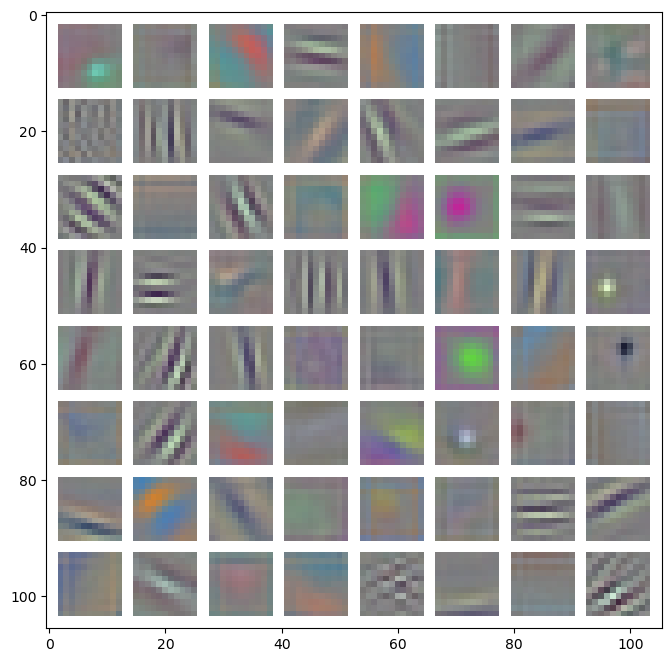

In [ ]:
from torchvision import models
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

alexnet = models.alexnet(weights="AlexNet_Weights.DEFAULT")
weight_tensor = alexnet.features[0].weight.data  # extract weights
print("Weights shape", weight_tensor.shape)

img_grid = utils.make_grid(
    (weight_tensor + 1) / 2, pad_value=1
)  # combine weights from all channel into table, note remapping to (0,1) range
print("Output is CxHxW image", img_grid.shape)

plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(
    np.transpose(img_grid, (1, 2, 0))
)  # change channel order for compability with numpy & matplotlib
plt.show()

Карта признаков после применения функции активации может быть передана на вход следующей операции свёртки.

Заметим, что после свёртки ширина $W_{out}$ и высота $H_{out}$ **карты признаков** будут отличаться от **пространственных размерностей** $W_{in}$ и $H_{in}$ исходного тензора. К примеру, при обработке трёхканального тензора размера $32 \times 32$ ядром размера $5 \times 5$, можно будет произвести лишь $27$ сдвигов $(32 - 5)$ по вертикали и столько же по горизонтали. Но при этом размер итоговой карты признаков будет равен $28 \times 28$, поскольку первый ряд (либо столбец) можно получить без сдвигов по вертикали либо горизонтали, соответственно. При повторном применении фильтра размер каждой из сторон уменьшится ещё на $4$.

Итоговое значение $N'$ пространственной размерности $N$ для квадратного фильтра $K \times K$ фильтра $F$ вычисляется по следующей формуле: $$\large N' = N - K + 1$$.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/decrease_size_of_image_after_convolution.png" width="2000">


Разберём на примере, как рассчитывать входные и выходные значения для каждого слоя свёрточной нейронной сети, изображённой на рисунке выше:

* входное изображение из набора данных СIFAR10 представляет собой 3 матрицы (по одной для каждого цвета red, green, blue) размером $32 \times 32$. То есть получаем тензор размерности $(3, 32, 32)$;

* если применить к нему 6 фильтров размерности $5 \times 5$, то на выходе получаем 6 матриц (одна матрица для одного фильтра) размером $(32-5+1) \times (32-5+1) = 28 \times 28$;

* теперь применим 10 фильтров размерности $5 \times 5$, тогда на выходе получаем 10 матриц (одна матрица для одного фильтра) размером $(28-5+1) \times (28-5+1) = 24 \times 24$.

Если бы мы после применения свёртки применили maxpooling размерности $2 \times 2$, то каждое измерение матрицы необходимо поделить на 2, получим тензор размерности $14 \times 14$.

Задание. Дополнить код свёрточной нейронной сети для набора данных MNIST необходимыми размерностями:

In [22]:
import torch
from torch import nn
input = torch.randn((1, 1, 28, 28))   # like MNIST

model = torch.nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5),
    # after conv shape: [3*24*24]
    nn.ReLU(),
    # after ReLU shape: [3*24*24]
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3),
    # after conv shape: [6*22*22]
    nn.ReLU(),
    # after ReLU shape: [6*22*22]
    nn.Flatten(),
    # after Flatten shape: [2904 = 6*22*22]
    nn.Linear(6*22*22, 100),
    nn.ReLU(),
    # after ReLU shape: [100]
    nn.Linear(100, 10),  # 10 classes, like MNIST
)

out = model(input)
print(f"out shape: {out.shape}")
# out shape: [10]


out shape: torch.Size([1, 10])


Задание. Дополнить код свёрточной нейронной сети для набора данных CIFAR10 необходимыми размерностями:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)        # 3 входных канала, 6 выходных, свёртка 5Х5
        self.pool = nn.MaxPool2d(kernel_size=2)                                     # MaxPooling 2X2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)       # 16 выходных каналов, свёртка 5Х5
        self.fc1 = nn.Linear(16*5*5, 120)                                           # 120 выходных значений
        self.fc2 = nn.Linear(120, 84)                                               # 84 выходных значений
        self.fc3 = nn.Linear(84, 10)                                                # 10 выходных значений

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Задание. Написать класс Net для изображения CIFAR10 со следующей архитектурой:

Net( <br>
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1)) <br>
  (conv2): Conv2d(???, 16, kernel_size=(5, 5), stride=(1, 1)) <br>
  (fc1): Linear(in_features=???, out_features=120, bias=True) <br>
  (fc2): Linear(in_features=???, out_features=84, bias=True)  <br>
  (fc3): Linear(in_features=???, out_features=10, bias=True)  <br>
)

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)        # 1 входный канал, 6 выходных, свёртка 5Х5
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)       # 16 выходных каналов, свёртка 5Х5
        self.fc1 = nn.Linear(16*24*24, 120)                                           # 120 выходных значений
        self.fc2 = nn.Linear(120, 84)                                               # 84 выходных значений
        self.fc3 = nn.Linear(84, 10)                                                # 10 выходных значений

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Чтобы посмотреть архитектуру, нужно просто создать экземпляр класса и напечатать его:
net = Net()
print(net)
Тогда получим название класса, какждого слоя и парамерты каждого слоя.

In [24]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Параметр dilation отвечает за расстояние между точками ядра, наглядное изображение для лучшего понимания: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md